<a href="https://colab.research.google.com/github/manhhung99/DAMH_192/blob/master/%C4%90%E1%BB%93_%C3%A1n_m%C3%B4n_h%E1%BB%8Dc_Hu%E1%BB%B3nh_M%E1%BA%A1nh_H%C6%B0ng_1711627_4_7_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1. Mount drive 
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Step 2. Tai ma nguon YOLO ve drive
!rm -rf darknet
%cd /content/gdrive/My\ Drive
!git clone https://github.com/AlexeyAB/darknet
%cd /content/gdrive/My\ Drive/darknet
!rm -rf data
!mkdir data

In [19]:
%cd /content/gdrive/My\ Drive/darknet/data
!unzip data.zip

/content/gdrive/My Drive/darknet/data
Archive:  data.zip
  inflating: binhthuong_0023.jpg     
  inflating: binhthuong_0023.txt     
  inflating: binhthuong_0024.jpg     
  inflating: binhthuong_0024.txt     
  inflating: binhthuong_0025.jpg     
  inflating: binhthuong_0025.txt     
  inflating: binhthuong_0026.jpg     
  inflating: binhthuong_0026.txt     
  inflating: binhthuong_0027.jpg     
  inflating: binhthuong_0027.txt     
  inflating: binhthuong_0028.jpg     
  inflating: binhthuong_0028.txt     
  inflating: binhthuong_0029.jpg     
  inflating: binhthuong_0029.txt     
  inflating: binhthuong_0030.jpg     
  inflating: binhthuong_0030.txt     
  inflating: binhthuong_0031.jpg     
  inflating: binhthuong_0031.txt     
  inflating: binhthuong_0032.jpg     
  inflating: binhthuong_0032.txt     
  inflating: binhthuong_0033.jpg     
  inflating: binhthuong_0033.txt     
  inflating: binhthuong_0045.jpg     
  inflating: binhthuong_0045.txt     
  inflating: binhthuong_0046.jp

In [4]:
%cd /content/gdrive/My\ Drive/darknet
!echo "face" > yolo.names
!echo "mask" > yolo.names
!echo "no_define" >> yolo.names

/content/gdrive/My Drive/darknet


In [5]:
!mv "/content/yolo.names" "/content/gdrive/My Drive/darknet"

In [21]:
%cd /content/gdrive/My\ Drive/darknet

import glob2
import math  
import os
import numpy as np

files = []
for ext in ["*.png", "*.jpeg", "*.jpg"]:
  image_files = glob2.glob(os.path.join("data/", ext))
  files += image_files

nb_val = math.floor(len(files)*0.2)
rand_idx = np.random.randint(0, len(files), nb_val)

# Tạo file train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(files)):
    if (os.path.exists(files[idx][:-3] + "txt")):
      f.write(files[idx]+'\n')

# Tạo file vali.txt
with open("val.txt", "w") as f:
  for idx in np.arange(len(files)):
    if (idx in rand_idx) and (os.path.exists(files[idx][:-3] + "txt")):
      f.write(files[idx]+'\n')

/content/gdrive/My Drive/darknet


In [7]:
%cd /content/gdrive/My\ Drive/darknet
!mkdir backup
!echo classes=3 > yolo.data
!echo train=train.txt >> yolo.data
!echo valid=val.txt >> yolo.data
!echo names=yolo.names >> yolo.data
!echo backup=backup >> yolo.data

/content/gdrive/My Drive/darknet


In [15]:
%cd /content/gdrive/My\ Drive/darknet
!rm darknet
!make

/content/gdrive/My Drive/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o obj/yolo.o obj/detector.o obj/layer.o obj/compare.o obj/classifier.o obj/local_layer.o obj/swag.o obj/sho

In [17]:
%cd /content/gdrive/My\ Drive/darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/gdrive/My Drive/darknet
--2020-07-04 16:04:06--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M   968KB/s    in 2m 1s   

2020-07-04 16:06:08 (1.28 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [22]:
%cd /content/gdrive/My\ Drive/darknet
!./darknet detector train yolo.data cfg/yolov3_custom.cfg "/content/gdrive/My Drive/darknet/darknet53.conv.74" -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.942619, GIOU: 0.942239), Class: 0.998660, Obj: 0.999748, No Obj: 0.003123, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.006751, iou_loss = 0.012181, total_loss = 0.018932 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 186991, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.916670, GIOU: 0.915096), Class: 0.999841, Obj: 0.999973, No Obj:

In [23]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/gdrive/My Drive/darknet/cfg
/content/gdrive/My Drive/darknet


In [26]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

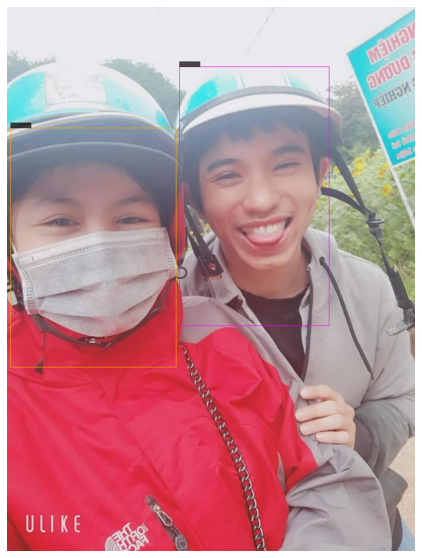

In [46]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test yolo.data cfg/yolov3_custom.cfg "/content/gdrive/My Drive/darknet/backup/yolov3_custom_1000.weights" "/content/Huy.jpg" -thresh 0.3
imShow('predictions.jpg')